<a href="https://colab.research.google.com/github/hadinursalim/NucleiSegmentation/blob/master/Nuclei_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Requirements**

In [1]:
!git clone https://github.com/hadinursalim/NucleiSegmentation

Cloning into 'NucleiSegmentation'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 220 (delta 6), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (220/220), 15.50 MiB | 33.98 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [2]:
%cd /content/NucleiSegmentation

/content/NucleiSegmentation


In [3]:
!pip install dominate
!pip install scipy==1.1.0
!pip install pytorch torchvision cudatoolkit==10.1 
!pip install visdom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.3.8 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.d

**Delete semua file dengan format .pyc**

In [4]:
list_pyc=["/content/NucleiSegmentation/options","/content/NucleiSegmentation/util"]

In [5]:
import os

for name in list_pyc:
  dir_name = name
  test = os.listdir(dir_name)

  for item in test:
      if item.endswith(".pyc"):
          os.remove(os.path.join(dir_name, item))

**Training New Model**


---



Data yang digunakan merupakan data sel kanker payudara yang diakses melalui **Kaggle**. Dataset berisi gambar dan label, yaitu untuk train masing-masing berjumlah 24 dan untuk test masing-masing berjumlah 8.

Tahap preprocessing yang dilakukan adalah melakukan croping gambar dan label serta me-resize ukurannya menjadi **256 x 256** . Selanjutnya dilakukan pairing gambar dan label, sehingga ukurannya menjadi **512 x 256**.

Sebagai gambaran berikut adalah contoh data yang digunakan:

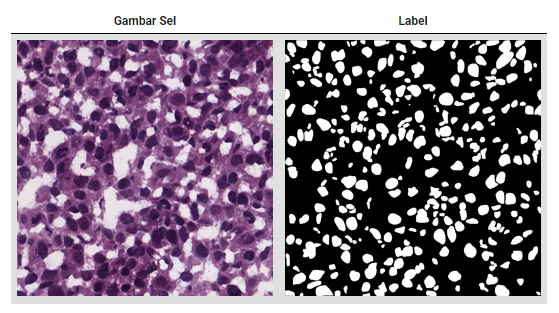

# **cycleGAN training**

In [6]:
!python train.py --dataroot "/content/NucleiSegmentation/Datasets Nuclei" --name NU_SEG  --gpu_ids 0 --display_id 0 --niter 200 --niter_decay 200 --pool_size 64 --loadSize 256 --fineSize 256 --model "cycle_gan"


----------------- Options ---------------
                batchSize: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                 dataroot: /content/NucleiSegmentation/Datasets Nuclei	[default: None]
             dataset_mode: aligned                       
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
              epoch_count: 1                             
                 fineSize: 256                           
                  gpu_ids: 0                             
                init_gain: 0.02               

# **cycleGAN testing**

In [7]:
!python test.py --dataroot "/content/NucleiSegmentation/Datasets Nuclei" --name NU_SEG  --gpu_ids 0 --display_id 0  --loadSize 256 --fineSize 256 --model "cycle_gan"  --checkpoints_dir /content/NucleiSegmentation/checkpoints


----------------- Options ---------------
             aspect_ratio: 1.0                           
                batchSize: 1                             
          checkpoints_dir: /content/NucleiSegmentation/checkpoints	[default: ./checkpoints]
                 dataroot: /content/NucleiSegmentation/Datasets Nuclei	[default: None]
             dataset_mode: aligned                       
               display_id: 0                             	[default: 1]
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                 fineSize: 256                           
                  gpu_ids: 0                             
                 how_many: 50                            
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
            

**Test image segmentation results**


---

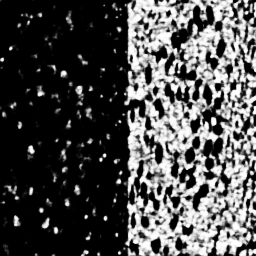